In [1]:
import pandas as pd
file_path = 'diamonds.csv'
# Đọc tệp CSV vào DataFrame
df = pd.read_csv(file_path,encoding='utf-8',header=0,delimiter=',')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,326
1,2,0.21,Premium,E,SI1,59.8,61.0,326
2,3,0.23,Good,E,VS1,56.9,65.0,327
3,4,0.29,Premium,I,VS2,62.4,58.0,334
4,5,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757


In [2]:
#cau 1 a
print('Số kim cương:',df['carat'].count())
print('Trung bình kim cương carat:',df['carat'].mean())
print('Độ lệch chuẩn carat:',df['carat'].std())
print('Phương sai carat:',df['carat'].var())

Số kim cương: 53940
Trung bình kim cương carat: 0.7979397478680014
Độ lệch chuẩn carat: 0.4740112444054184
Phương sai carat: 0.22468665982277333


In [3]:
#câu 1b
import pandas as pd
from scipy import stats
import numpy as np
random_sample = df['carat'].sample(n=25, random_state=15)
sample_mean = random_sample.mean()
sample_std = random_sample.std()
n = len(random_sample)
standard_error = sample_std / np.sqrt(n)
confidence_interval = stats.t.interval(0.95, df=n-1, loc=sample_mean, scale=standard_error)
print(f"Ước lượng: {confidence_interval}")
#câu 1c
#nhận xét: giá trị trung bình nằm trong khoảng ước lượng

Ước lượng: (0.5895783685079863, 0.9832216314920139)


In [4]:
#câu 2
import pandas as pd
from scipy import stats
random_sample = df['carat'].sample(n=1000, random_state=15)
sample_mean = random_sample.mean()
t_statistic, p_value = stats.ttest_1samp(random_sample, popmean=0.7)
print(f"Trung bình mẫu: {sample_mean:.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Kiểm tra mức ý nghĩa 5%
alpha = 0.05
if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thuyết H0")
else:
    print("Không đủ bằng chứng để bác bỏ giả thuyết H0")

Trung bình mẫu: 0.7982
T-statistic: 6.3497
P-value: 0.0000
Có đủ bằng chứng để bác bỏ giả thuyết H0


Mean Squared Error (MSE): 16025561.23
R-squared (R2): -0.00


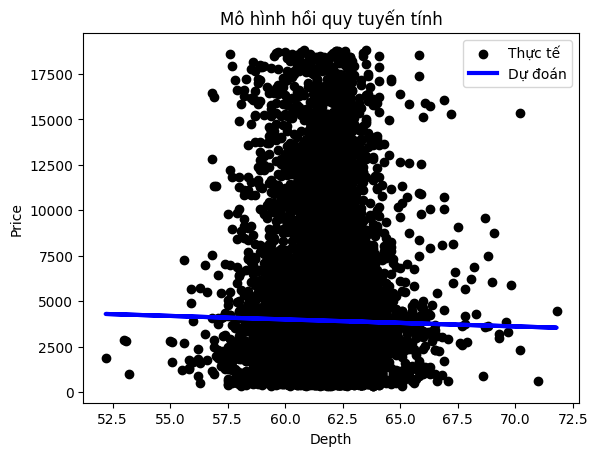

In [5]:
#câu 3a
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def linear_regression_depth_to_price(data):
    # Chọn biến độc lập (feature) và biến phụ thuộc (target)
    X = data[['depth']]
    y = data['price']

    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

    # Xây dựng mô hình hồi quy tuyến tính
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Đánh giá mô hình
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'R-squared (R2): {r2:.2f}')

    # Vẽ biểu đồ so sánh giá thực tế và giá dự đoán
    plt.scatter(X_test, y_test, color='black', label='Thực tế')
    plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Dự đoán')
    plt.xlabel('Depth')
    plt.ylabel('Price')
    plt.title('Mô hình hồi quy tuyến tính')
    plt.legend()
    plt.show()

    return model
linear_model = linear_regression_depth_to_price(df)

In [6]:
#câu 3b
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df=df[['carat','price']]

X=df[['carat']].values
y=df[['price']].values

# mức 20% random=16
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler #z-score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn import metrics
import numpy as np
steps=[('model',LinearRegression())]

In [8]:
pipe=Pipeline(steps)
pipe

Pipeline(steps=[('model', LinearRegression())])

In [9]:
model=pipe.fit(X_train,y_train)

In [10]:
y_test_pred=pipe.predict(X_test)

In [11]:
carat_predict=1.2

carat_predict=pipe.predict([[carat_predict]])

print('Giá trị dự báo giá kim cương: ',carat_predict)

Giá trị dự báo giá kim cương:  [[7049.57958784]]
